# 自组织特征映射网络

## Self-Organization Feature Map，SOFM （SOM）

 <font size=4 face="宋体">使用Python的第三方库 <font size=4 color=blue>**minisom**</font>  进行自组织映射(SOM)聚类分析</font>  
   
   https://github.com/JustGlowing/minisom/tree/master  
     

In [1]:
import os
from minisom import MiniSom
import numpy as np
import pandas as pd
from nnc import dataset as Data
from nnc.plot_tool import draw_som
drawsom = draw_som()

<font size=4 color=blue>**例 4-2**  </font> <font size=4 face="宋体">  动物属性特征映射 (16种动物，13种属性)</font>

- <font size=3 face="宋体">  1989年Kohonen给出一个SOM网的著名应用实例，即把不同的动物按其属性映射到二维输出平面上，使属性相似的动物在SOM网输出平面上的位置也相近.  </font>  
- <font size=3 face="宋体">  训练集选了16种动物，每种动物用一个29维向量来表示. 前16个分量构成one-hot向量，表示动物所属类别；后13个分量构成属性向量，描述动物的13种属性的有或无（用1或0表示）. </font>

<img src=".\image\animal_data.png" alt="animal_data" width="70%">

In [2]:
# 读取animal数据
data_path = os.path.normpath('datasets/animals')
#data_name = 'animals.xlsx'
animals = Data.animal_data(data_path=data_path)
#print(animals.dataset)
print(animals.train_set)
# 训练样本
X = np.array(animals.train_set).astype(np.float64)
classnum = animals.classnum
cnames = animals.classname

       a1 a2 a3 a4 a5 a6 a7 a8 a9 a10  ... two-legs four-legs hair hooves  \
pigeon  1  0  0  0  0  0  0  0  0   0  ...        1         0    0      0   
hen     0  1  0  0  0  0  0  0  0   0  ...        1         0    0      0   
duck    0  0  1  0  0  0  0  0  0   0  ...        1         0    0      0   
goose   0  0  0  1  0  0  0  0  0   0  ...        1         0    0      0   
owl     0  0  0  0  1  0  0  0  0   0  ...        1         0    0      0   
hawk    0  0  0  0  0  1  0  0  0   0  ...        1         0    0      0   
eagle   0  0  0  0  0  0  1  0  0   0  ...        1         0    0      0   
fox     0  0  0  0  0  0  0  1  0   0  ...        0         1    1      0   
dog     0  0  0  0  0  0  0  0  1   0  ...        0         1    1      0   
wolf    0  0  0  0  0  0  0  0  0   1  ...        0         1    1      0   
cat     0  0  0  0  0  0  0  0  0   0  ...        0         1    1      0   
tiger   0  0  0  0  0  0  0  0  0   0  ...        0         1    1      0   

0 鸽子
1 母鸡
2 鸭子
3 鹅
4 猫头鹰
5 隼
6 鹰
7 狐狸
8 狗
9 狼
10 猫
11 虎
12 狮
13 马
14 斑马
15 牛


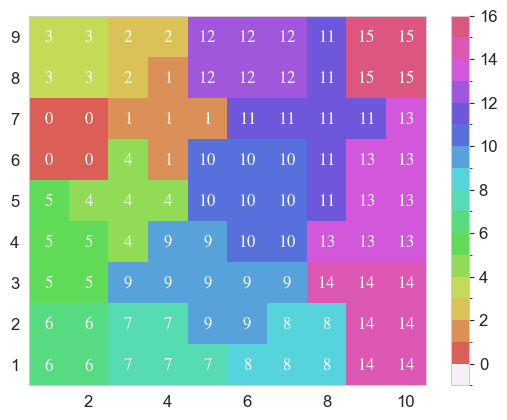

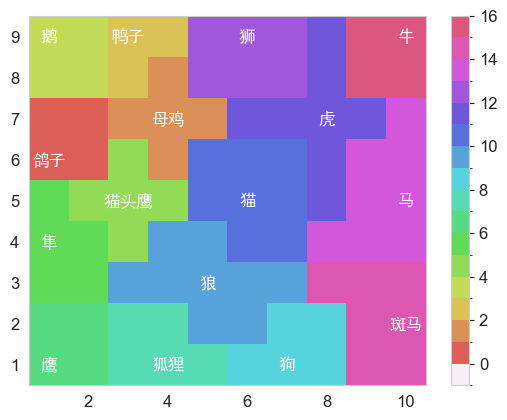

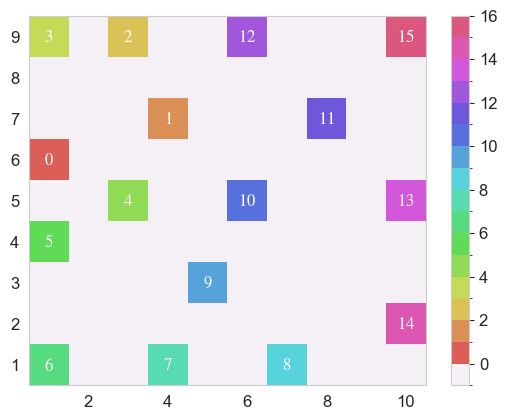

In [3]:
# 训练样本
# 数据归一化处理
X = Data.normalization(X,'norm')
# 样本标签
y = np.linspace(0,X.shape[0]-1,X.shape[0]).astype(np.int64)

# 竞争层 网格维度(M*M) 神经元数目：M*M
som_shape = (9,10)
# som模型
sigma = 1.0  #  0.6  # 邻域参数
lr = 0.5   # 学习率
neighborhood_func =  'gaussian'  #  'mexican_hat' #
activation_distance =  'euclidean' #  'manhattan'  #  'chebyshev' # 'cosine'# 
random_seed = 45
som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=sigma, learning_rate=lr,
              neighborhood_function=neighborhood_func,activation_distance=activation_distance, random_seed=random_seed)
# 开始训练
som.train_random(X,15000)
#som.train_batch(X,20000)

# 获胜神经元的坐标
winner_coordinates = np.array([som.winner(x) for x in X]).T
# 数据点的聚类标签
cluster_index = np.ravel_multi_index(winner_coordinates,som_shape)

# 绘制SOM 网络特征映射图
maps,winner,winner_maps = drawsom.cal_maps(som,X,som_shape)
for cidx,cname in animals.classname.items():
    print(cidx,cname[1])
# 网络特征映射图
animals.draw_som_maps(maps)
animals.draw_som_maps(maps,winner,text_type='zh')
# 获胜神经元映射图
animals.draw_som_maps(winner_maps)    

<font size=4 color=blue>**例 4-3**  </font> <font size=4 face="宋体"> SOFM网络用于字符排序</font>

- <font size=3 face="宋体">  用32个字符（包括26个英文字母和6个数字(1-6)）.  每个字符对应于一个5维向量.</font> 

<img src=".\image\character_data.png" alt="character_data" width="80%">

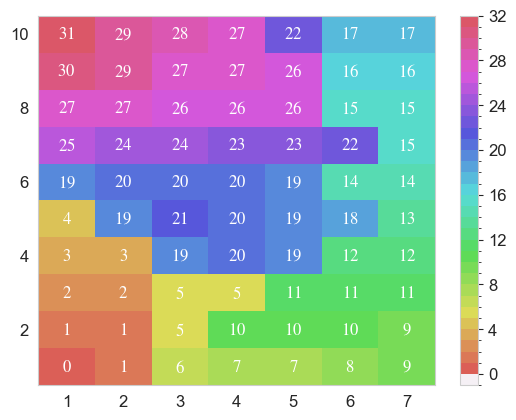

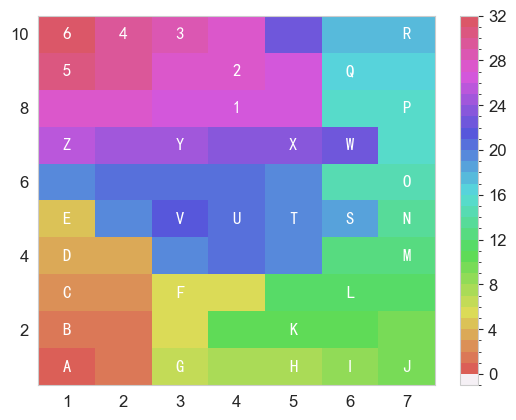

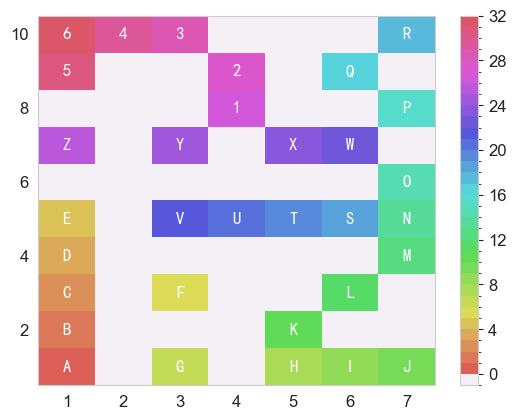

In [4]:
# 读取acharacter数据(字符)
data_path = os.path.normpath('datasets/characters')
#data_name = 'characters.xlsx'
chars = Data.character_data(data_path=data_path)
# 训练样本
X = np.array(chars.dataset).astype(np.float64)
#print(X)
classnum = chars.classnum
classname = chars.classname

# 训练样本
# 数据归一化处理
#X = Data.normalization(X,'norm')
# 样本标签
y = np.linspace(0,X.shape[0]-1,X.shape[0]).astype(np.int64)

# 竞争层 网格维度(M*M) 神经元数目：M*M
som_shape = (10,7) # (7,10) # 
# som模型
sigma = 1.0 #  1.0  #  邻域参数
lr = 0.5   # 学习率
neighborhood_func =  'gaussian'  #  'mexican_hat' #
activation_distance =  'euclidean' #  'manhattan'  #  'chebyshev' # 'cosine'# 
random_seed = 45
som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=sigma, learning_rate=lr,
              neighborhood_function=neighborhood_func,activation_distance=activation_distance, random_seed=random_seed)
# 开始训练
som.train_random(X,20000)
#som.train_batch(X,20000)

# 获胜神经元的坐标
winner_coordinates = np.array([som.winner(x) for x in X]).T
# 数据点的聚类标签
cluster_index = np.ravel_multi_index(winner_coordinates,som_shape)
# 绘制SOM 网络特征映射图
maps,winner,winner_maps = drawsom.cal_maps(som,X,som_shape)

drawsom.draw_som_maps(maps,classnum=classnum,classname=classname)
drawsom.draw_som_maps(maps,winner,text_type='en',classnum=classnum,classname=classname)
drawsom.draw_som_maps(winner_maps,winner,text_type='en',classnum=classnum,classname=classname)
